## Observations and Insights 

1. Ramicane and Capomulin as treatments were successful in reducing the volume of the tumor size during the trial period. Running these regimens under a longer study could prove even more success. 

2. Ramicane and Capomulin also had a smaller Standard Deviation of their tumor size. This shows that the regimens produced more consistent results among the mice that they tested. The higher Standard Deviation numbers of the other regimens show a more sporadic result range amongst the mice in those groups. 

3. In the Capomulin test group, the size of tumor strongly correlated with weight of mouse. Do larger mice produce larger tumors? Or, more then likely, the larger tumors will ultimately add to the total weight of their mice. Running these computations against the other regimen groups would help sus out this information



In [177]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from pylab import rcParams
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Checking the number of mice.
mouse_count=merged_df['Mouse ID'].unique()
mouse_count=len(mouse_count)
mouse_count

249

In [67]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df=merged_df[merged_df.duplicated(['Mouse ID','Timepoint'])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [68]:
# Optional: Get all the data for the duplicate mouse ID. 
schrodinger_mouse=merged_df[(merged_df['Mouse ID']=='g989')]
schrodinger_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cutmouse=merged_df[merged_df['Mouse ID']=='g989'].index
merged_df.drop(cutmouse, inplace=True)
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the clean DataFrame.
mouse_recount=merged_df['Mouse ID'].unique()
mouse_recount=len(mouse_recount)
mouse_recount

248

## Summary Statistics

In [181]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_df=merged_df[['Drug Regimen','Tumor Volume (mm3)']]
#Use .groupby('Drug Regimen'). aggregate functions to create new lists
drug_mean=drug_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
drug_median=drug_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
drug_var=drug_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
drug_std=drug_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
drug_sem=drug_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# test out variables-drug_mean,drug_median,drug_var,drug_std,drug_sem

# This method is the most straight forward, creating multiple series and putting them all together at the end.
#create summary table with Mean Median Variance Standard Dev and SEM as Series titles
summary_table1=pd.DataFrame({
    "Mean": drug_mean,
    "Median": drug_median,
    "Variance":drug_var,
    "Standard Deviation":drug_std,
    "Standard Error of Mean":drug_sem
    })
summary_table1

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_df.head()
# This method produces everything in a single groupby function
drug_agg=drug_df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
drug_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

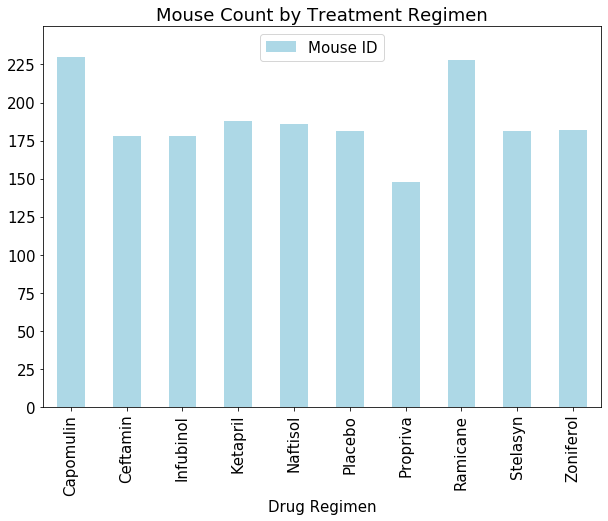

In [40]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# need to create list of drug treatments, and list of a count of each mouse in those treatments. 
bar_df=merged_df[['Mouse ID','Drug Regimen']]
treatment_mice=bar_df.groupby('Drug Regimen').count()
treatment_mice.plot(kind='bar',figsize=(10,7),title="Mouse Count by Treatment Regimen",rot=90,color='lightblue',yticks=range(0,250,25),ylim=(0,250))


In [16]:
#Grab count
mouse_count=bar_df.groupby('Drug Regimen').count()['Mouse ID']
mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

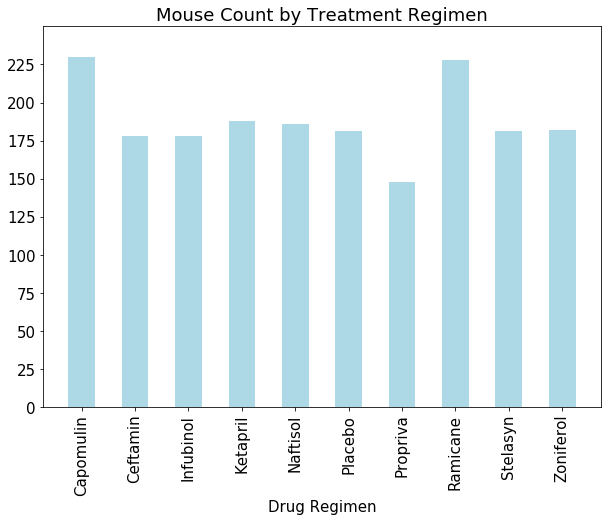

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#grab regimen list and set tick_marks on regimen
regimen=bar_df['Drug Regimen'].unique()
regimen=regimen.tolist()
regimen=sorted(regimen)
tick_marks= [value for value in regimen]
#plot and configure
plt.figure(figsize=(10,7))
plt.bar(regimen, mouse_count, width=0.5,color='lightblue')
plt.xticks(tick_marks,rotation='vertical')
plt.ylim(0,250)
plt.title('Mouse Count by Treatment Regimen')
plt.xlabel('Drug Regimen')
plt.yticks(np.arange(0,250,25))
plt.show

In [18]:
#grab gender count using groupby on sex series against Mouse ID
gender_count=merged_df.groupby('Sex').count()['Mouse ID']
gender_count

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

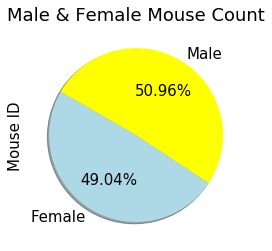

In [179]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count.plot(kind='pie',
                  y='sex',
                  autopct='%1.2f%%', 
                  title="Male & Female Mouse Count",
                  shadow=True,fontsize=15,
                 colors=['lightblue','yellow'],
                  startangle=150)



<function matplotlib.pyplot.show(*args, **kw)>

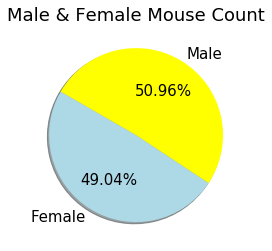

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Female','Male']
colors=['lightblue','yellow']
plt.pie(gender_count,labels=labels,colors=colors,shadow=True,startangle=150, autopct='%1.2f%%',)
plt.title('Male & Female Mouse Count')
plt.rcParams.update({'font.size': 15})
plt.show



## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list= ["Capomulin","Ramicane","Infubinol","Ceftamin"]
#Dataframe of the 4 selected regimens
four_drugs=merged_df[merged_df['Drug Regimen'].isin(drug_list)]


# Start by getting the last (greatest) timepoint for each mouse
# try using .agg and a lambda function and iloc[-1] to get the last tumor volume
last_tumor=four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
            final_tumor_size=('Tumor Volume (mm3)',lambda x:x.iloc[-1])).round(2)

# stack unstack to move drug regimen to series headers
last_tumor=last_tumor.stack(level=0).unstack(level=0)
last_tumor.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,final_tumor_size,NaN,NaN,67.97,NaN
a251,final_tumor_size,NaN,NaN,65.53,NaN
a275,final_tumor_size,NaN,63.0,NaN,NaN
a411,final_tumor_size,NaN,NaN,NaN,38.41
a444,final_tumor_size,NaN,NaN,NaN,43.05


In [61]:
# Put treatments into a list for for loop (and later for plot labels)
# already did= drug_list

#empty count to iterate through for loop
count=0

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    quartiles = last_tumor[drug].quantile([.25,.50,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round((upperq-lowerq),2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    
    #f string prints of drug name quartiles and iqr and median
    if count ==0:
        print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(f"{drug}")
    print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    print(f"Lower Quartile: {lowerq}")
    print(f"Upper Quartile: {upperq}")
    print(f"InterQuartile Range: {iqr}")
    print(f"Median Tumor Volume: {quartiles[.50]}")
    print(f"Values below: {lower_bound} could be outliers")
    print(f"Values above: {upper_bound} could be outliers")
    print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    count += 1      
          
   

~~~~~~~~~~~~~~~~~~~~~~~~~~~
Capomulin
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lower Quartile: 32.38
Upper Quartile: 40.16
InterQuartile Range: 7.78
Median Tumor Volume: 38.13
Values below: 20.71 could be outliers
Values above: 51.83 could be outliers
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Ramicane
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lower Quartile: 31.56
Upper Quartile: 40.66
InterQuartile Range: 9.1
Median Tumor Volume: 36.56
Values below: 17.91 could be outliers
Values above: 54.31 could be outliers
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Infubinol
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lower Quartile: 54.05
Upper Quartile: 65.53
InterQuartile Range: 11.48
Median Tumor Volume: 60.17
Values below: 36.83 could be outliers
Values above: 82.75 could be outliers
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Ceftamin
~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lower Quartile: 48.72
Upper Quartile: 64.3
InterQuartile Range: 15.58
Median Tumor Volume: 59.85
Values below: 25.35 could be outliers
Values above: 87.67 could be outliers
~~~~~~~~~~~~~~~~~~~~~~~~~~~


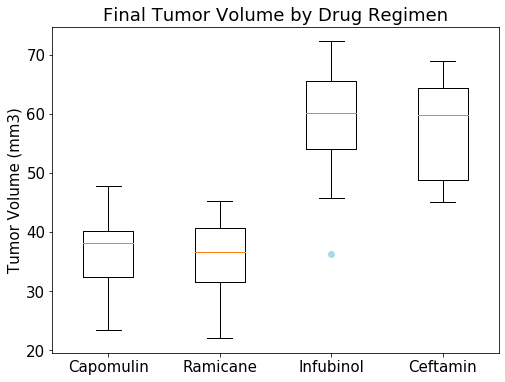

In [82]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
     
    #print box plot through function
#empty list for for loop    
boxplot=[]
#for loop of drug_list
for drug in drug_list:
    boxplot.append(list(last_tumor[drug].dropna()))
#config boxplot with each drug within figure    
fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(boxplot,sym='lightblue')
plt.xticks([1,2,3,4],drug_list)
plt.show()

## Line and Scatter Plots

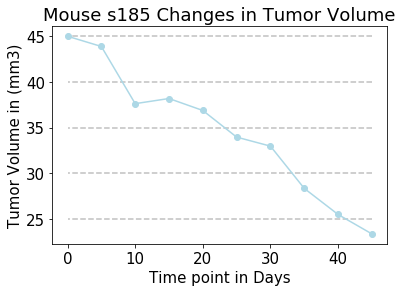

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_mouse=cap_mice['Mouse ID'].unique()
mouse_s185=merged_df[(merged_df['Mouse ID']== 's185')]
mouse_s185
timepoint185=mouse_s185['Timepoint']
volume185=mouse_s185['Tumor Volume (mm3)']
#plot and configure add hlines dashed
plt.plot(timepoint185,volume185,marker='o',color='lightblue')
plt.hlines([25,30,35,40,45],45,0, alpha=0.25,linestyles='dashed')
#titles and labels
plt.xlabel('Time point in Days')
plt.ylabel('Tumor Volume in (mm3)')
plt.title('Mouse s185 Changes in Tumor Volume')
plt.show()

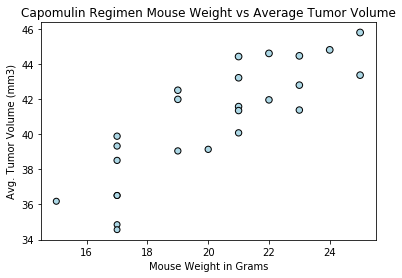

In [161]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#use cap_mice to get the average tumor volume to compare to weight
cap_info=cap_mice.groupby('Mouse ID').agg(\
                tumor_avg=('Tumor Volume (mm3)',np.mean),\
                weight_avg=('Weight (g)',np.mean)).round(2)

#pull over x and y values for the scatter plot
x_value = cap_info['weight_avg']
y_value = cap_info['tumor_avg']

# plot and configure
plt.scatter(
    x_value,
    y_value,
    marker='o',
    s=cap_info['tumor_avg'],
    facecolors='lightblue',
    edgecolors='black'
             )
             
#add titles and labels
plt.title('Capomulin Regimen Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight in Grams')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between the two is 0.8419
The r-squared value is 0.7087


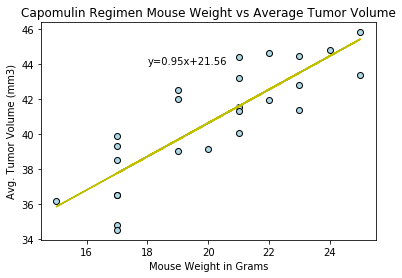

In [176]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish correlation, unpack linregress,set regress line,set line_eq
correlation=st.pearsonr(cap_info['weight_avg'],cap_info['tumor_avg'])
(slope, intercept, rvalue, pvalue, stderr)= linregress(cap_info['weight_avg'],cap_info['tumor_avg'])
regress_values = cap_info['weight_avg'] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
#print f strings for correlation and r-squared
print(f'The correlation between the two is {round(correlation[0],4)}')
print(f'The r-squared value is {round(rvalue**2,4)}')
#plot and configure, add regress line and annotate line_eq
plt.scatter(
    x_value,
    y_value,
    marker='o',
    facecolors="lightblue",
    edgecolors='black'
            )
plt.plot(x_value,regress_values,'y-')
plt.annotate(line_eq,(18,44),color='black')
#add title and labels
plt.title('Capomulin Regimen Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight in Grams')
plt.ylabel('Avg. Tumor Volume (mm3)')
plt.show()